# 커피 지수
### - (스타벅스 + 커피빈) / (이디야 + 빽다방)
### - 2020년 9월 데이터 (공공데이터포털/소상공인시장진흥공단_상가(상권)정보)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 데이터 정리하기

#### 시범적으로 하나의 데이터로 확인

In [2]:
df = pd.read_csv('./data/지역별/소상공인시장진흥공단_상가(상권)정보_서울_202009.csv', sep='|')
df = df[df['상권업종중분류코드'] == 'Q12']
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
4,19993199,고려대학교교육관쎄리오점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129012500100010002039525,고려대학교안암캠퍼스(인문사회계),서울특별시 성북구 안암로 145,136701,2841.0,NaN,1,32,127.031702,37.588485
7,20020124,스완카페트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013300106040056037792,NaN,서울특별시 영등포구 도신로10가길 11-1,150070,7379.0,NaN,2,NaN,126.897710,37.503693
25,19973708,왕실,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114012700101050000019781,NaN,서울특별시 중구 남대문로 52-13,100810,4535.0,NaN,1,NaN,126.982419,37.562274
29,20004707,커피빈,코리아교대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010800116570005024412,카이스시스템빌딩,서울특별시 서초구 서초중앙로 118,137070,6634.0,NaN,1,NaN,127.014217,37.492388


In [3]:
df = df[['상호명', '지점명', '도로명주소', '경도', '위도']]
df.head()

,상호명,지점명,도로명주소,경도,위도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
4,고려대학교교육관쎄리오점,NaN,서울특별시 성북구 안암로 145,127.031702,37.588485
7,스완카페트,NaN,서울특별시 영등포구 도신로10가길 11-1,126.897710,37.503693
25,왕실,NaN,서울특별시 중구 남대문로 52-13,126.982419,37.562274
29,커피빈,코리아교대점,서울특별시 서초구 서초중앙로 118,127.014217,37.492388


In [4]:
sb = df[df['상호명'].str.find('스타벅스') >= 0]
sb.head()

,상호명,지점명,도로명주소,경도,위도
635,스타벅스,이태원점,서울특별시 용산구 이태원로 188,126.994781,37.534303
1272,스타벅스종로3가점,종로3가점,서울특별시 종로구 종로 113-1,126.990207,37.570585
1712,스타벅스,신사2점,서울특별시 서초구 강남대로 581,127.019763,37.513663
8936,스타벅스커피여의도IFC1F,NaN,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
8945,스타벅스,삼성역점,서울특별시 강남구 테헤란로103길 9,127.063878,37.510038


In [5]:
sb1 = df[df['상호명'].str.upper().str.find('STARBUCKS') >= 0]
sb1.head()

,상호명,지점명,도로명주소,경도,위도
137508,STARBUCKSCOFFEE,NaN,서울특별시 서초구 신반포로 176,127.002393,37.50393


In [6]:
cb = df[df['상호명'].str.find('커피빈') >= 0]
cb.head()

,상호명,지점명,도로명주소,경도,위도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
29,커피빈,코리아교대점,서울특별시 서초구 서초중앙로 118,127.014217,37.492388
59,커피빈,코리아대학로대명거리점,서울특별시 종로구 대명길 25,127.000171,37.583149
242,커피빈,코리아선릉역점,서울특별시 강남구 테헤란로 335,127.048223,37.504750
952,커피빈코리아강남역먹자골목점,코리아강남역먹자골목점,서울특별시 강남구 테헤란로1길 29,127.027280,37.500101


In [7]:
cb1 = df[df['상호명'].str.upper().str.find('COFFEEBEAN') >= 0]
cb1.head()

,상호명,지점명,도로명주소,경도,위도
220399,COFFEEBEAN영동2교사거리점,영동2교사거리점,서울특별시 강남구 논현로 136,127.043233,37.481877


In [8]:
ed = df[df['상호명'].str.find('이디야') >= 0]
ed.head()

,상호명,지점명,도로명주소,경도,위도
930,이디야커피,신길역점,서울특별시 영등포구 영등포로 353,126.918062,37.515118
1779,이디야커피,이마트구로점,서울특별시 구로구 디지털로32길 43,126.897870,37.484385
4977,이디야커피,중계롯데우성점,서울특별시 노원구 노원로22길 34,127.072754,37.646364
8532,이디야커피,금호역점,서울특별시 성동구 장터길 17-1,127.017791,37.548427
9151,이디야커피,NaN,서울특별시 강남구 테헤란로104길 8,127.064790,37.508585


In [9]:
ed1 = df[df['상호명'].str.upper().str.find('EDIYA') >= 0]
ed1.head()

,상호명,지점명,도로명주소,경도,위도
24724,EDIYA커피,NaN,서울특별시 강남구 선릉로 661,127.041570,37.515581
118360,EDIYACOFFEE,NaN,서울특별시 서초구 방배로 234,126.989903,37.494120
136060,EDIYACOFFEE,NaN,서울특별시 강서구 양천로 583,126.864328,37.557106
153709,EDIYACOFFEESHOP,NaN,서울특별시 종로구 필운대로1길 35,126.967501,37.577795
224209,EDIYA카페,NaN,서울특별시 강서구 송정로 70,126.809952,37.560949


In [10]:
bd = df[df['상호명'].str.find('빽다방') >= 0]
bd.head()

,상호명,지점명,도로명주소,경도,위도
7002,빽다방커피,NaN,서울특별시 서초구 서초중앙로22길 25,127.015447,37.493461
20760,빽다방둔촌동역점,둔촌동역점,서울특별시 강동구 양재대로 1339,127.134989,37.525943
21928,빽다방,명동중앙우체국점,서울특별시 중구 남대문로 58-1,126.981851,37.562422
23443,빽다방명일역점,명일역점,서울특별시 강동구 구천면로 418,127.145015,37.550507
24494,빽다방,구로로제리움점,서울특별시 구로구 가마산로26길 5,126.890981,37.496080


In [11]:
bd1 = df[df['상호명'].str.upper().str.find('PAIKSCOFFEE') >= 0]
bd1.head()

,상호명,지점명,도로명주소,경도,위도
67488,빽다방PAIKSCOFFEE,NaN,서울특별시 마포구 마포대로4길 16,126.946484,37.538757
125496,PAIKSCOFFEE,NaN,서울특별시 송파구 올림픽로35길 104,127.099289,37.519810


#### 모든 광역시도에 대해 적용

In [12]:
starbucks = pd.DataFrame(columns=['상호명', '지점명', '도로명주소', '경도', '위도'])
coffeebean = pd.DataFrame(columns=['상호명', '지점명', '도로명주소', '경도', '위도'])
ediya = pd.DataFrame(columns=['상호명', '지점명', '도로명주소', '경도', '위도'])
paik = pd.DataFrame(columns=['상호명', '지점명', '도로명주소', '경도', '위도'])

In [13]:
from glob import glob
data_files = glob('./data/지역별/*.csv')

for filename in data_files:
    print(filename)
    df = pd.read_csv(filename, sep='|')
    df = df[df['상권업종중분류코드'] == 'Q12']
    df = df[['상호명', '지점명', '도로명주소', '경도', '위도']]

    sb = df[df['상호명'].str.contains('스타벅스|STARBUCKS|스타박스', case=False)]
    cb = df[df['상호명'].str.contains('커피빈|COFFEEBEAN', case=False)]
    ed = df[df['상호명'].str.contains('이디야|EDIYA|이디아', case=False)]
    bd = df[df['상호명'].str.contains('빽다방|PAIKSCOFFEE', case=False)]
    """ sb = df[df['상호명'].str.find('스타벅스') >= 0]
    sb1 = df[df['상호명'].str.upper().str.find('STARBUCKS') >= 0]
    cb = df[df['상호명'].str.find('커피빈') >= 0]
    cb1 = df[df['상호명'].str.upper().str.find('COFFEEBEAN') >= 0]
    ed = df[df['상호명'].str.find('이디야') >= 0]
    ed1 = df[df['상호명'].str.upper().str.find('EDIYA') >= 0]
    bd = df[df['상호명'].str.find('빽다방') >= 0]
    bd1 = df[df['상호명'].str.upper().str.find('PAIKSCOFFEE') >= 0] """

    starbucks = pd.concat([starbucks, sb])
    coffeebean = pd.concat([coffeebean, cb])
    ediya = pd.concat([ediya, ed])
    paik = pd.concat([paik, bd])

./data/지역별\소상공인시장진흥공단_상가(상권)정보_강원_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_경기_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_경남_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_경북_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_광주_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_대구_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_대전_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_부산_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_서울_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_세종_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_울산_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_인천_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_전남_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_전북_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_제주_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_충남_202009.csv
./data/지역별\소상공인시장진흥공단_상가(상권)정보_충북_202009.csv


In [14]:
starbucks.to_csv('./results/스타벅스.csv', index=False)
coffeebean.to_csv('./results/커피빈.csv', index=False)
ediya.to_csv('./results/이디야.csv', index=False)
paik.to_csv('./results/빽다방.csv', index=False)

### 도로명주소에서 광역시도와 시군구/행정구명 찾기

In [15]:
# 행정구
tmp_gu_dict = {
    '수원':['장안구', '권선구', '팔달구', '영통구'], 
    '성남':['수정구', '중원구', '분당구'], 
    '안양':['만안구', '동안구'], 
    '안산':['상록구', '단원구'], 
    '고양':['덕양구', '일산동구', '일산서구'], 
    '용인':['처인구', '기흥구', '수지구'], 
    '청주':['상당구', '서원구', '흥덕구', '청원구'], 
    '천안':['동남구', '서북구'], 
    '전주':['완산구', '덕진구'], 
    '포항':['남구', '북구'], 
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [16]:
tmp_gu_dict.keys()

dict_keys(['수원', '성남', '안양', '안산', '고양', '용인', '청주', '천안', '전주', '포항', '창원'])

In [17]:
def split_addr(dfarg):
    metro, city = [], []
    for i in dfarg.index:
        addr = str(dfarg['도로명주소'][i]).split()
        metro.append(addr[0])
        if (addr[1][:2] in tmp_gu_dict.keys()):
            city.append(addr[2])
        else:
            city.append(addr[1])
    dfarg['광역시도'] = metro
    dfarg['시군구'] = city
    return dfarg

In [18]:
starbucks = split_addr(starbucks)
coffeebean = split_addr(coffeebean)
ediya = split_addr(ediya)
paik = split_addr(paik)

In [19]:
def get_ID(dfarg):
    si_name = [None] * len(dfarg)
    for n in dfarg.index:
        if dfarg['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        
            # 같은 '시도' 이름을 가지는 고성 지역 처리
            if dfarg['시군구'][n].strip()[:-1]=='고성' and dfarg['광역시도'][n]=='강원도':
                si_name[n] = '고성(강원)'
            elif dfarg['시군구'][n].strip()[:-1]=='고성' and dfarg['광역시도'][n]=='경상남도':
                si_name[n] = '고성(경남)'
            else:
                si_name[n] = dfarg['시군구'][n].strip()[:-1] 
        
            # 광역시가 아니면서 구를 가지고 있는 시 처리 
            for keys, values in tmp_gu_dict.items():
                if dfarg['시군구'][n].strip() in values:
                    if len(dfarg['시군구'][n]) == 2:
                        si_name[n] = keys + ' ' + dfarg['시군구'][n]
                    elif dfarg['시군구'][n] in ['마산합포구','마산회원구']:
                        si_name[n] = keys + ' ' + dfarg['시군구'][n][2:-1]
                    else:
                        si_name[n] = keys + ' ' + dfarg['시군구'][n][:-1]
        
        elif dfarg['광역시도'][n] == '세종특별자치시':  # 세종자치시의 경우는 세종으로
            si_name[n] = '세종'
        
        else:  # tmp_gu_dict와 세종을 제외한 나머지 지역 처리 
            if len(dfarg['시군구'][n].strip()) >= 3:
                si_name[n] = dfarg['광역시도'][n][:2] + ' ' + dfarg['시군구'][n][:-1]
            else:   # 인천 미추홀구 
                if dfarg['시군구'][n] == '남구' and dfarg['광역시도'][n] == '인천광역시':
                    si_name[n] = '인천 미추홀'
                else:
                    si_name[n] = dfarg['광역시도'][n][:2] + ' ' + dfarg['시군구'][n]
        
    return si_name

In [20]:
starbucks.reset_index(inplace=True)
starbucks.drop('index', axis=1, inplace=True)
starbucks.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구
0,스타벅스,NaN,강원도 원주시 금불1길 28-5,127.931032,37.348466,강원도,원주시
1,스타벅스,오션월드2호점,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,강원도,홍천군
2,스타벅스,대명델피노리조트점,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,강원도,고성군
3,스타벅스,강대점,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,강원도,춘천시
4,스타벅스,속초중앙로점,강원도 속초시 중앙로 123,128.589463,38.202621,강원도,속초시


In [21]:
starbucks['ID'] = get_ID(starbucks)
starbucks['브랜드명'] = '스타벅스'
starbucks['스타벅스 매장수'] = 1
starbucks.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,스타벅스 매장수
0,스타벅스,NaN,강원도 원주시 금불1길 28-5,127.931032,37.348466,강원도,원주시,원주,스타벅스,1
1,스타벅스,오션월드2호점,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,강원도,홍천군,홍천,스타벅스,1
2,스타벅스,대명델피노리조트점,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,강원도,고성군,고성(강원),스타벅스,1
3,스타벅스,강대점,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,강원도,춘천시,춘천,스타벅스,1
4,스타벅스,속초중앙로점,강원도 속초시 중앙로 123,128.589463,38.202621,강원도,속초시,속초,스타벅스,1


In [22]:
coffeebean.reset_index(inplace=True)
coffeebean.drop('index', axis=1, inplace=True)
coffeebean['ID'] = get_ID(coffeebean)
coffeebean['브랜드명'] = '커피빈'
coffeebean['커피빈 매장수'] = 1
coffeebean.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,커피빈 매장수
0,커피빈,NaN,강원도 동해시 일출로 107,129.118963,37.552715,강원도,동해시,동해,커피빈,1
1,커피빈,코리아원주AK플라자점,강원도 원주시 봉화로 1,127.927626,37.345679,강원도,원주시,원주,커피빈,1
2,커피빈,곰씨네,강원도 춘천시 동내면 춘천순환로 61-15,127.751359,37.856311,강원도,춘천시,춘천,커피빈,1
3,커피빈,NaN,경기도 이천시 남천로 93,127.447687,37.276730,경기도,이천시,이천,커피빈,1
4,커피빈,코리아수원인계점,경기도 수원시 팔달구 권광로 195,127.032669,37.264938,경기도,팔달구,수원 팔달,커피빈,1


In [23]:
ediya.reset_index(inplace=True)
ediya.drop('index', axis=1, inplace=True)
ediya['ID'] = get_ID(ediya)
ediya['브랜드명'] = '이디야'
ediya['이디야 매장수'] = 1
ediya.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,이디야 매장수
0,이디야커피,우두동점,강원도 춘천시 충열로 39,127.732714,37.899493,강원도,춘천시,춘천,이디야,1
1,이디야커피,철원와수점,강원도 철원군 서면 와수로181번길 25-21,127.438109,38.239147,강원도,철원군,철원,이디야,1
2,이디야커피,하이원점,강원도 정선군 고한읍 하이원길 265-1,128.827807,37.209488,강원도,정선군,정선,이디야,1
3,이디야에스프레소,NaN,강원도 춘천시 시청길10번길 4-1,127.728578,37.880075,강원도,춘천시,춘천,이디야,1
4,이디야커피,춘천애막골점,강원도 춘천시 후석로186번길 18,127.754289,37.867310,강원도,춘천시,춘천,이디야,1


In [24]:
paik.reset_index(inplace=True)
paik.drop('index', axis=1, inplace=True)
paik['ID'] = get_ID(paik)
paik['브랜드명'] = '빽다방'
paik['빽다방 매장수'] = 1
paik.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,빽다방 매장수
0,빽다방,NaN,강원도 원주시 무실로12번길 33,127.947781,37.350006,강원도,원주시,원주,빽다방,1
1,빽다방,춘천석사CGV점,강원도 춘천시 지석로 85,127.744832,37.851125,강원도,춘천시,춘천,빽다방,1
2,빽다방,강릉금학점,강원도 강릉시 신대학길 14,128.894954,37.752800,강원도,강릉시,강릉,빽다방,1
3,빽다방,삼척대학로점,강원도 삼척시 대학로 23-8,129.163077,37.443281,강원도,삼척시,삼척,빽다방,1
4,빽다방,원주단구GS점,강원도 원주시 남원로534번길 20,127.948675,37.330389,강원도,원주시,원주,빽다방,1


In [25]:
starbucks.to_csv('./results/스타벅스2.csv', index=False)
coffeebean.to_csv('./results/커피빈2.csv', index=False)
ediya.to_csv('./results/이디야2.csv', index=False)
paik.to_csv('./results/빽다방2.csv', index=False)

### 브랜드별 피벗 테이블 생성

In [26]:
pt_sb = starbucks.pivot_table('스타벅스 매장수', index='ID', aggfunc='sum')
pt_sb = pt_sb.reset_index()
print(len(pt_sb))
pt_sb.head()

191


,ID,스타벅스 매장수
0,강릉,5
1,거제,5
2,경기,2
3,경산,8
4,경주,8


In [27]:
pt_cb = coffeebean.pivot_table('커피빈 매장수', index='ID', aggfunc='sum')
pt_cb = pt_cb.reset_index()
print(len(pt_cb))
pt_cb.head()

99


,ID,커피빈 매장수
0,경주,2
1,고양 덕양,1
2,고양 일산동,5
3,고양 일산서,5
4,광주 남구,2


In [28]:
pt_ed = ediya.pivot_table('이디야 매장수', index='ID', aggfunc='sum')
pt_ed = pt_ed.reset_index()
print(len(pt_ed))
pt_ed.head()

235


,ID,이디야 매장수
0,가평,8
1,강릉,15
2,강진,1
3,거제,7
4,거창,1


In [29]:
pt_bd = paik.pivot_table('빽다방 매장수', index='ID', aggfunc='sum')
pt_bd = pt_bd.reset_index()
print(len(pt_bd))
pt_bd.head()

147


,ID,빽다방 매장수
0,강릉,2
1,거창,1
2,경산,3
3,경주,2
4,고성(경남),2


### 커피샵 데이터 병합

In [30]:
coffee = pd.merge(pt_ed, pt_sb, how='left', on='ID')
coffee.head()

,ID,이디야 매장수,스타벅스 매장수
0,가평,8,NaN
1,강릉,15,5.0
2,강진,1,NaN
3,거제,7,5.0
4,거창,1,NaN


In [31]:
coffee = pd.merge(coffee, pt_cb, how='left', on='ID')
coffee = pd.merge(coffee, pt_bd, how='left', on='ID')
coffee.head()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수
0,가평,8,NaN,NaN,NaN
1,강릉,15,5.0,NaN,2.0
2,강진,1,NaN,NaN,NaN
3,거제,7,5.0,NaN,NaN
4,거창,1,NaN,NaN,1.0


In [32]:
coffee = coffee.fillna(0)
coffee.head()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수
0,가평,8,0.0,0.0,0.0
1,강릉,15,5.0,0.0,2.0
2,강진,1,0.0,0.0,0.0
3,거제,7,5.0,0.0,0.0
4,거창,1,0.0,0.0,1.0


In [33]:
coffee['스타벅스 매장수'] = coffee['스타벅스 매장수'].astype(int)
coffee['커피빈 매장수'] = coffee['커피빈 매장수'].astype(int)
coffee['빽다방 매장수'] = coffee['빽다방 매장수'].astype(int)

In [34]:
coffee['커피지수'] = (coffee['스타벅스 매장수']+coffee['커피빈 매장수']) / \
                        (coffee['이디야 매장수']+coffee['빽다방 매장수'])
coffee.tail()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
230,홍성,4,0,0,2,0.000000
231,홍천,3,2,0,1,0.500000
232,화성,26,19,5,11,0.648649
233,화천,1,0,0,0,0.000000
234,횡성,1,0,0,0,0.000000


In [35]:
coffee.to_csv('./results/커피피봇테이블.csv', index=False)

### 카토그램과 커피 데이터 합치기

In [36]:
df = pd.read_csv('./results/03.pop.csv', index_col = 0)
df.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID,y,x,여성비,2030여성비
0,강원,강릉시,46008,20993,40497,203057,101154,101903,1.036768,0,강릉,3,11,0.184431,-4.370979
1,강원,고성군,4006,1699,7005,23621,11933,11688,0.485082,1,고성(강원),0,10,-0.518606,-7.588617
2,강원,동해시,16311,7510,16152,83888,42093,41795,0.929916,1,동해,4,11,-0.177618,-3.957452
3,강원,삼척시,12428,5280,14953,61833,31630,30203,0.706213,1,삼척,5,11,-1.153915,-7.515288
4,강원,속초시,15928,7411,14010,76302,37488,38814,1.057959,0,속초,1,10,0.868916,-3.471873


In [37]:
df = df[['ID', 'y', 'x']]
df.head()

,ID,y,x
0,강릉,3,11
1,고성(강원),0,10
2,동해,4,11
3,삼척,5,11
4,속초,1,10


In [38]:
coffee_index = pd.merge(df, coffee, how='left', on='ID')
coffee_index = coffee_index.fillna(0)
coffee_index.head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
0,강릉,3,11,15.0,5.0,0.0,2.0,0.294118
1,고성(강원),0,10,1.0,2.0,0.0,0.0,2.000000
2,동해,4,11,1.0,1.0,1.0,1.0,1.000000
3,삼척,5,11,1.0,1.0,0.0,2.0,0.333333
4,속초,1,10,8.0,4.0,0.0,0.0,0.500000


In [39]:
coffee_index.to_csv('./results/커피지수.csv', index=False)

### 카토그램 그리기

In [40]:
BORDER_LINES = [
    [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

In [41]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                     min(blockedMap[targetData]))*0.25 + \
                     min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
        if len(row.ID.split())==2:
            dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
        elif row.ID[:2]=='고성':
            dispname = '고성'
        else:
            dispname = row.ID

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 표시
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

## 커피지수

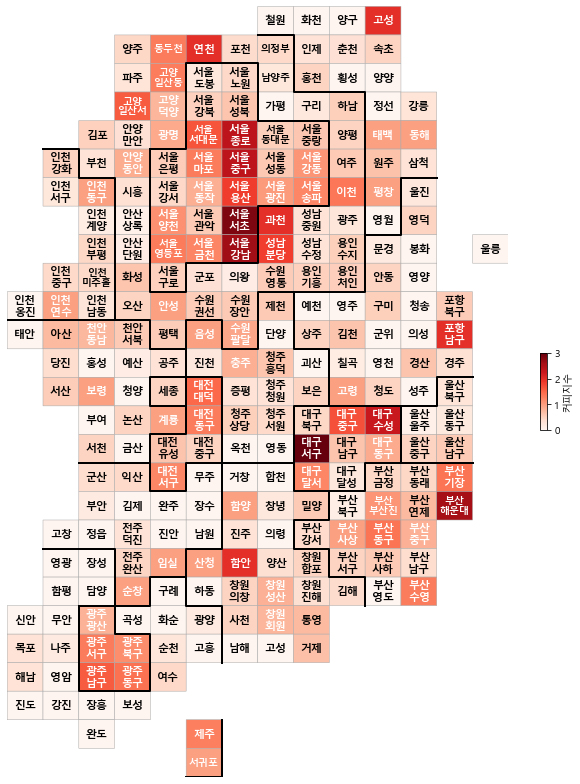

In [42]:
drawKorea('커피지수', coffee_index, 'Reds')

In [43]:
# 커피지수 Top 10
coffee_index.sort_values(by='커피지수', ascending=False).head(10)

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
116,대구 서구,15,8,1.0,3.0,0.0,0.0,3.000000
154,서울 서초,7,6,21.0,49.0,31.0,7.0,2.857143
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
139,부산 해운대,17,12,11.0,29.0,5.0,2.0,2.615385
163,서울 중구,5,6,23.0,57.0,15.0,7.0,2.400000
162,서울 종로,4,6,15.0,33.0,15.0,5.0,2.400000
117,대구 수성,14,10,9.0,23.0,2.0,2.0,2.272727
19,과천,7,7,1.0,4.0,0.0,1.0,2.000000
79,함안,19,6,1.0,0.0,2.0,0.0,2.000000
88,포항 남구,11,12,4.0,10.0,0.0,1.0,2.000000


#### 스타벅스 매장수

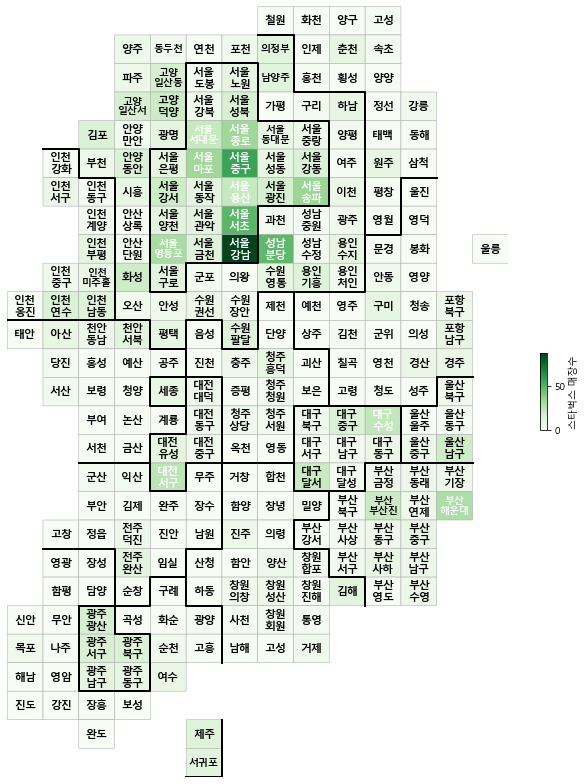

In [44]:
drawKorea('스타벅스 매장수', coffee_index, 'Greens')

In [45]:
# 스타벅스 매장수 Top 5
coffee_index.sort_values(by='스타벅스 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
163,서울 중구,5,6,23.0,57.0,15.0,7.0,2.400000
154,서울 서초,7,6,21.0,49.0,31.0,7.0,2.857143
34,성남 분당,8,7,23.0,48.0,17.0,12.0,1.857143
157,서울 송파,6,8,28.0,34.0,13.0,10.0,1.236842


#### 커피빈 매장수

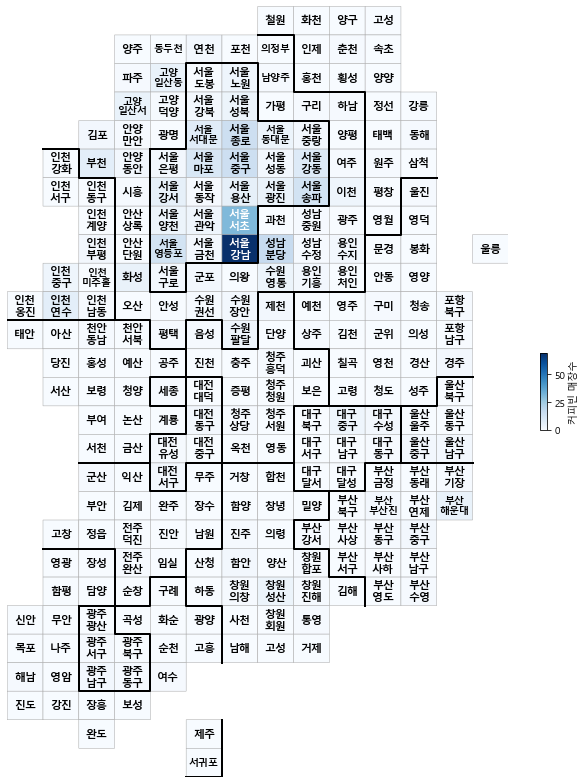

In [46]:
drawKorea('커피빈 매장수', coffee_index, 'Blues')

In [47]:
# 커피빈 매장수 Top 5
coffee_index.sort_values(by='커피빈 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
154,서울 서초,7,6,21.0,49.0,31.0,7.0,2.857143
34,성남 분당,8,7,23.0,48.0,17.0,12.0,1.857143
163,서울 중구,5,6,23.0,57.0,15.0,7.0,2.400000
162,서울 종로,4,6,15.0,33.0,15.0,5.0,2.400000


#### 이디야 매장수

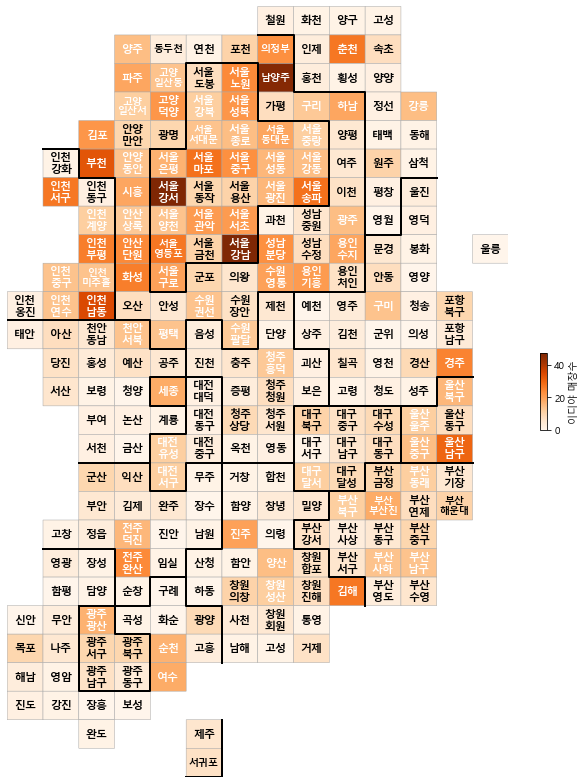

In [48]:
drawKorea('이디야 매장수', coffee_index, 'Oranges')

In [49]:
# 이디야 매장수 Top 5
coffee_index.sort_values(by='이디야 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
143,서울 강서,6,4,47.0,19.0,6.0,8.0,0.454545
27,남양주,2,7,46.0,12.0,1.0,3.0,0.265306
173,인천 남동,10,2,35.0,13.0,1.0,13.0,0.291667
33,부천,5,2,33.0,7.0,7.0,9.0,0.333333


#### 빽다방 매장수

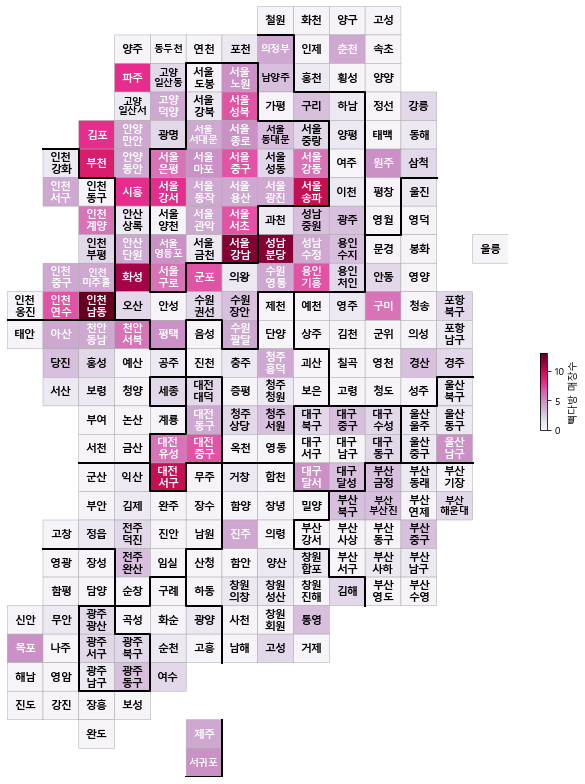

In [50]:
drawKorea('빽다방 매장수', coffee_index, 'PuRd')

In [51]:
# 빽다방 매장수 Top 5
coffee_index.sort_values(by='빽다방 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
173,인천 남동,10,2,35.0,13.0,1.0,13.0,0.291667
34,성남 분당,8,7,23.0,48.0,17.0,12.0,1.857143
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
59,화성,9,3,26.0,19.0,5.0,11.0,0.648649
121,대전 서구,16,4,12.0,25.0,2.0,10.0,1.227273


### 지도 위에 표시하기

In [52]:
import folium
import json

In [53]:
coffee_index_folium = coffee_index.set_index('ID')
coffee_index_folium.head()

,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
ID,,,,,,,
강릉,3,11,15.0,5.0,0.0,2.0,0.294118
고성(강원),0,10,1.0,2.0,0.0,0.0,2.000000
동해,4,11,1.0,1.0,1.0,1.0,1.000000
삼척,5,11,1.0,1.0,0.0,2.0,0.333333
속초,1,10,8.0,4.0,0.0,0.0,0.500000


In [54]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = coffee_index_folium['커피지수'],
               columns = [coffee_index_folium.index, coffee_index_folium['커피지수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>커피지수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [62]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = coffee_index_folium['스타벅스 매장수'],
               columns = [coffee_index_folium.index, coffee_index_folium['스타벅스 매장수']],
               fill_color = 'YlOrRd',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>스타벅스 매장수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map